# <strong style="font-size:20px">75.06 - Organización de Datos</strong><br /><span style="font-size:15px">TP1 - Análisis Exploratorio</span><br /><br /><span style="font-size:15px">1C 2019</span>

In [122]:
#Importación de librerías utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Configuracón general del notebook
%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')

#Estilo y tamaño de los gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(style="whitegrid")

In [123]:
#Lectura del CSV con los datos a explorar
tp1_data =  pd.read_csv('Datos/train.csv')

In [124]:
#Tamaño del dataframe en filas y columnas
tp1_data.shape

(240000, 23)

In [125]:
#Cantidad de elementos en el dataframe
tp1_data.size

5520000

In [126]:
#Información básica del dataframe, y el tipo de dato de las columnas
#Al ser un dataframe pequeño, no optimizaremos espacio cambiando los tipos de datos
tp1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [127]:
#Vemos las primeras 3 filas para explorar ejemplos de los datos
tp1_data.head(n=3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,...,"23,533.00",nan,nan,2015-08-23 00:00:00,0.00,0.00,0.00,0.00,0.00,"2,273,000.00"
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,...,"24,514.00",19.31,-99.23,2013-06-28 00:00:00,0.00,0.00,0.00,1.00,1.00,"3,600,000.00"
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,...,"48,551.00",nan,nan,2015-10-17 00:00:00,0.00,0.00,0.00,0.00,0.00,"1,200,000.00"


# <span style="font-size:18px">1 - Análisis de cantidades en general</span><br /><span style="font-size:15px">1.1 - Cantidad de publicaciones por tipo de propiedad</span>

In [128]:
#Valores posibles para el tipo de propiedad
tp1_data["tipodepropiedad"].value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

Text(0, 0.5, 'Ciudad')

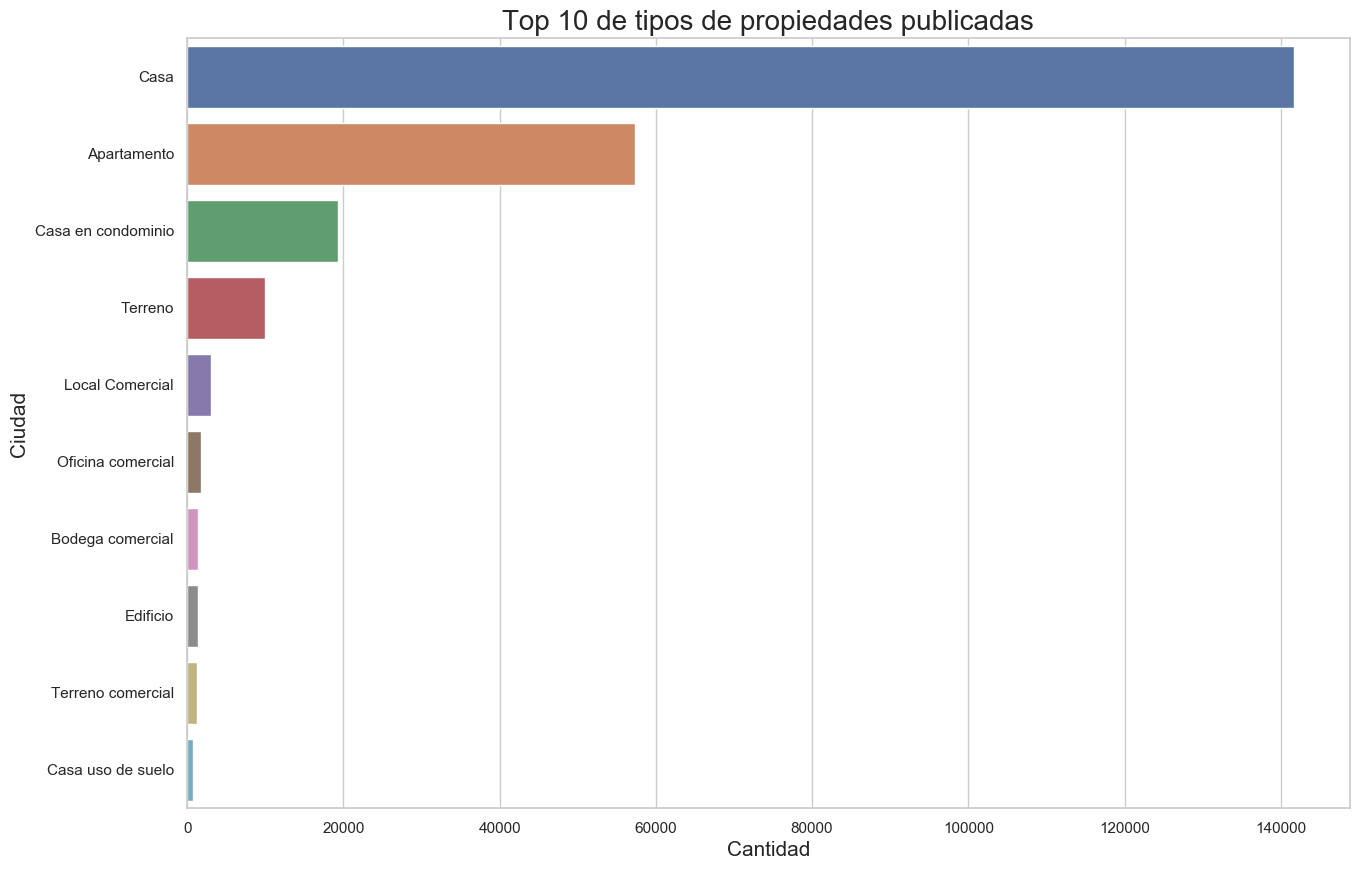

In [129]:
#Graficamos el TOP 10
tipo_grafico_data = tp1_data['tipodepropiedad'].value_counts()[:10]
g = sns.barplot(x=tipo_grafico_data.values, y=tipo_grafico_data.index, orient='h')
g.set_title(u"Top 10 de tipos de propiedades publicadas", fontsize=20)
g.set_xlabel(u"Cantidad", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

# <span style="font-size:18px">1 - Análisis de cantidades en general</span><br /><span style="font-size:15px">1.2 - Cantidad de publicaciones por ubicación geográfica</span>

In [130]:
#Valores posibles para el campo provincia
tp1_data["provincia"].value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

Text(0, 0.5, 'Ciudad')

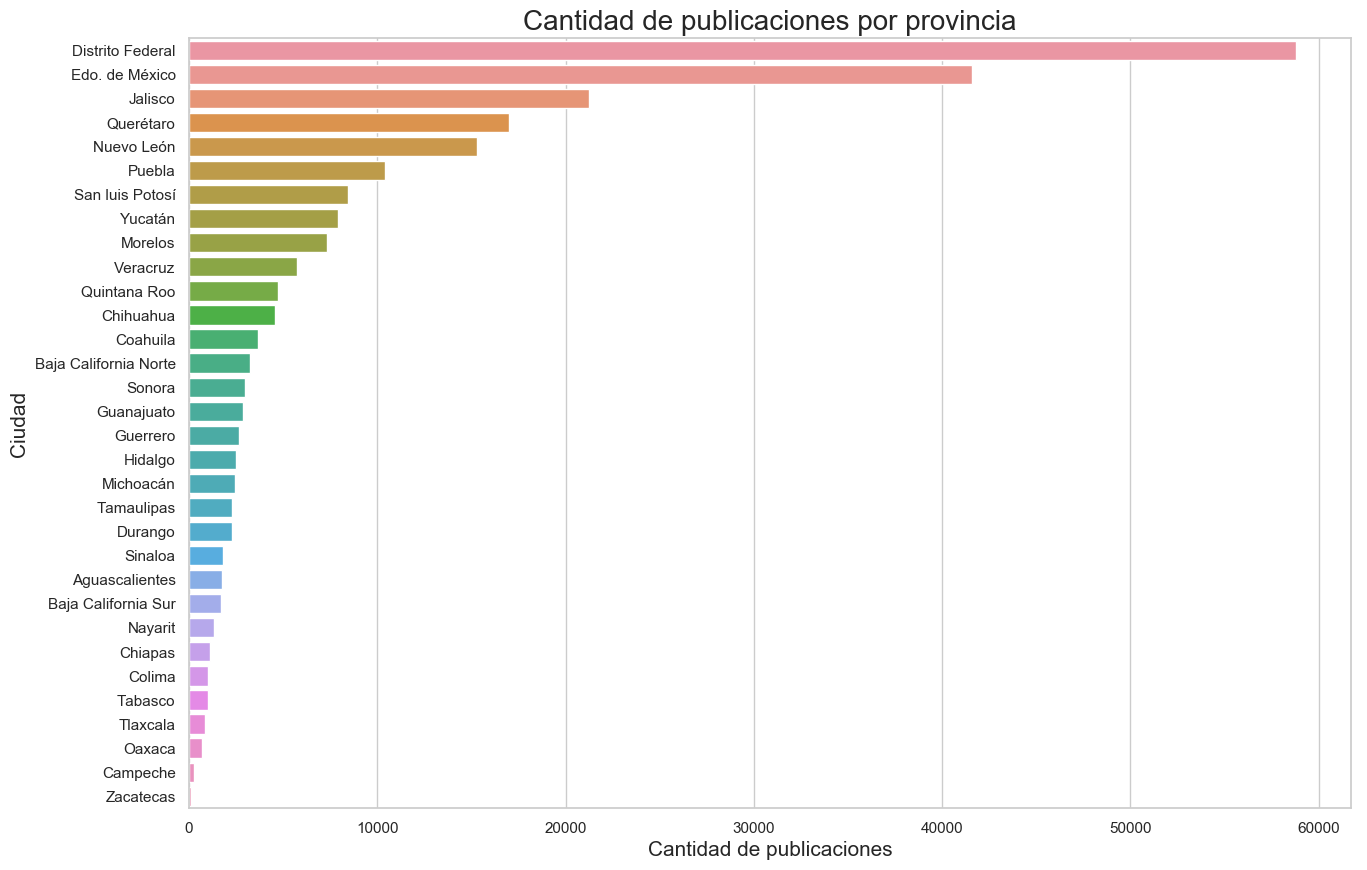

In [195]:
#Graficamos la cantidad de publicaciones por provincia
provincias_grafico_data = tp1_data['provincia'].value_counts()
g = sns.barplot(x=provincias_grafico_data.values, y=provincias_grafico_data.index, orient='h')
g.set_title(u"Cantidad de publicaciones por provincia", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

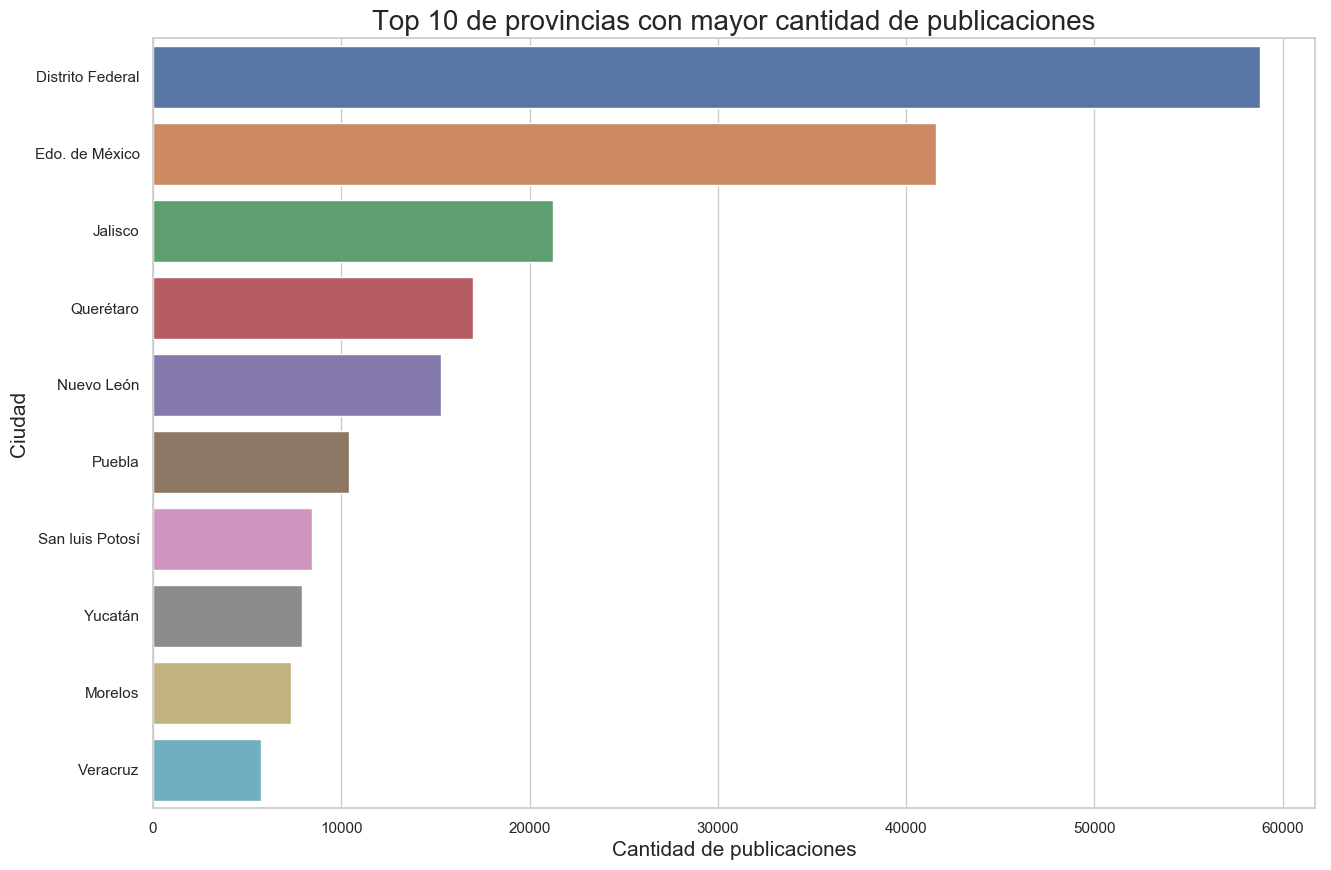

In [194]:
#Graficamos el TOP 10 de cantidad de publicaciones por provincia
provincias_grafico_data = tp1_data['provincia'].value_counts()[:10]
g = sns.barplot(x=provincias_grafico_data.values, y=provincias_grafico_data.index, orient='h')
g.set_title(u"Top 10 de provincias con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

In [132]:
#Valores posibles para el campo ciudad
tp1_data["ciudad"].value_counts()

Querétaro                        12646
Benito Juárez                    11014
Zapopan                          10360
San Luis Potosí                   7925
Mérida                            7162
Monterrey                         6946
Alvaro Obregón                    6633
Cuauhtémoc                        6614
Naucalpan de Juárez               6554
Miguel Hidalgo                    5795
Atizapán de Zaragoza              5783
Tlalpan                           5721
Huixquilucan                      5718
Coyoacán                          5293
Puebla                            4636
Guadalajara                       4006
San Andrés Cholula                3805
Cancún                            3779
Cuernavaca                        3775
Chihuahua                         3757
Tlalnepantla de Baz               3588
Cuautitlán Izcalli                3408
Tlajomulco de Zúñiga              3254
Gustavo A. Madero                 3141
Iztapalapa                        3093
Cuajimalpa de Morelos    

Text(0, 0.5, 'Ciudad')

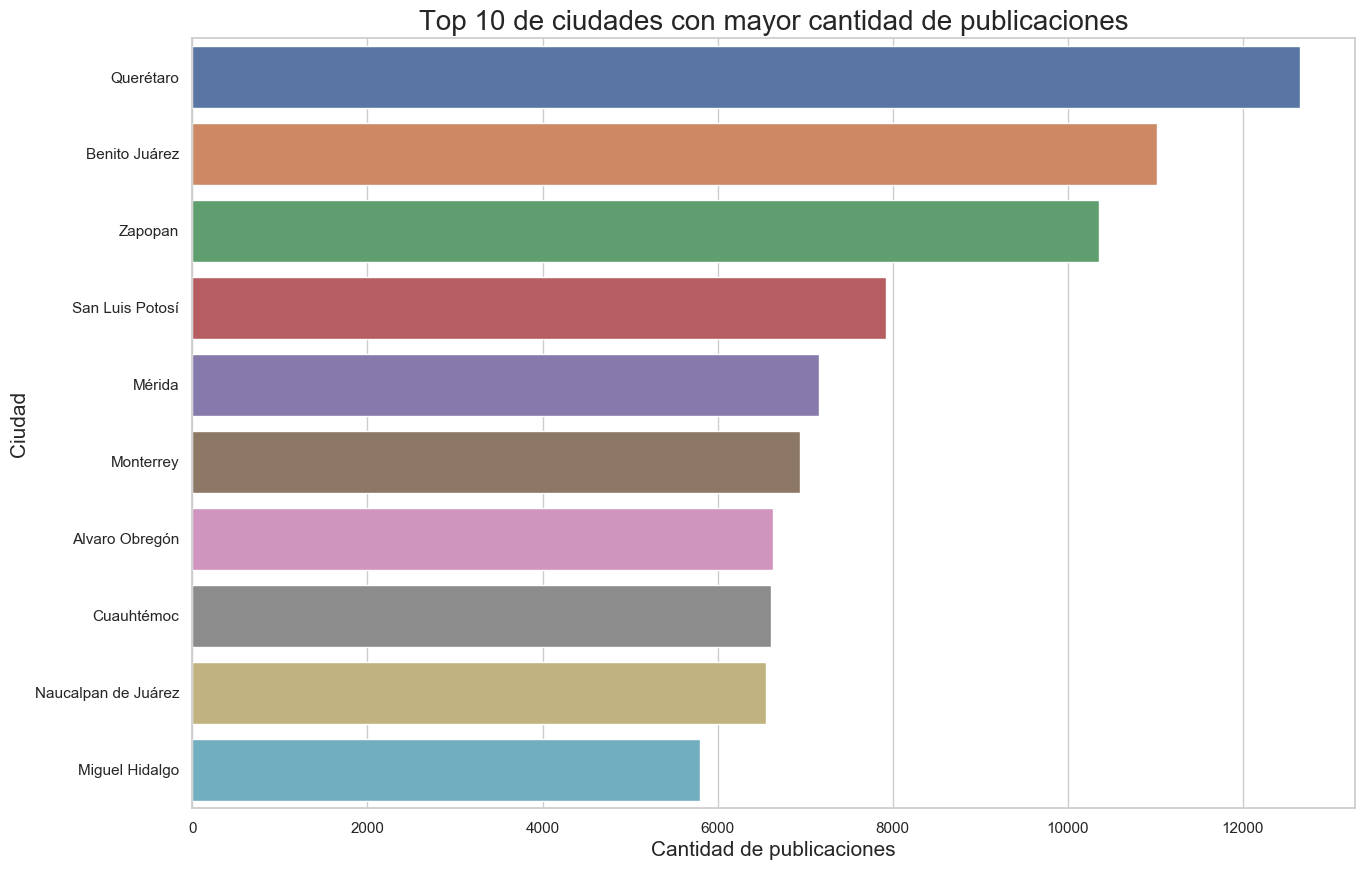

In [185]:
#Graficamos el TOP 10 de cantidad de publicaciones por ciudad
ciudades_grafico_data = tp1_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_grafico_data.values, y=ciudades_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

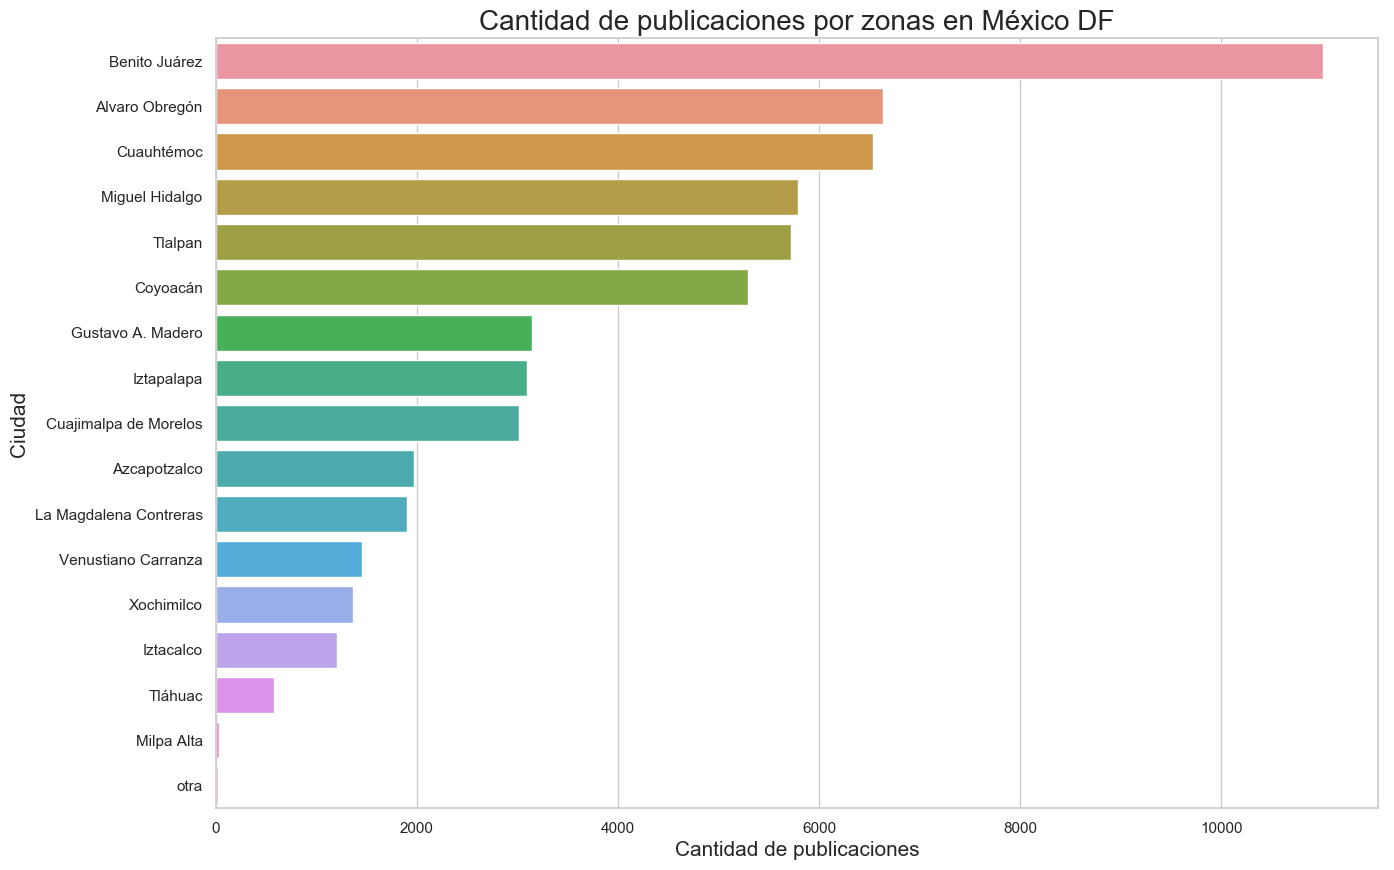

In [202]:
#Para las 5 ciudades con mayor cantidad de publicaciones, analiazamos el TOP 10 de ciudades con mayor cantidad de publicaciones
#Esto representa el aproximadamente el 70% del total de publicaciones (164.368/240.000) = 0,68.
#Graficamos para ciudad de mexico el total de las zonas
ciudades_df_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Distrito Federal']
ciudades_df_grafico_data = ciudades_df_grafico_data['ciudad'].value_counts()
g = sns.barplot(x=ciudades_df_grafico_data.values, y=ciudades_df_grafico_data.index, orient='h')
g.set_title(u"Cantidad de publicaciones por zonas en México DF", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

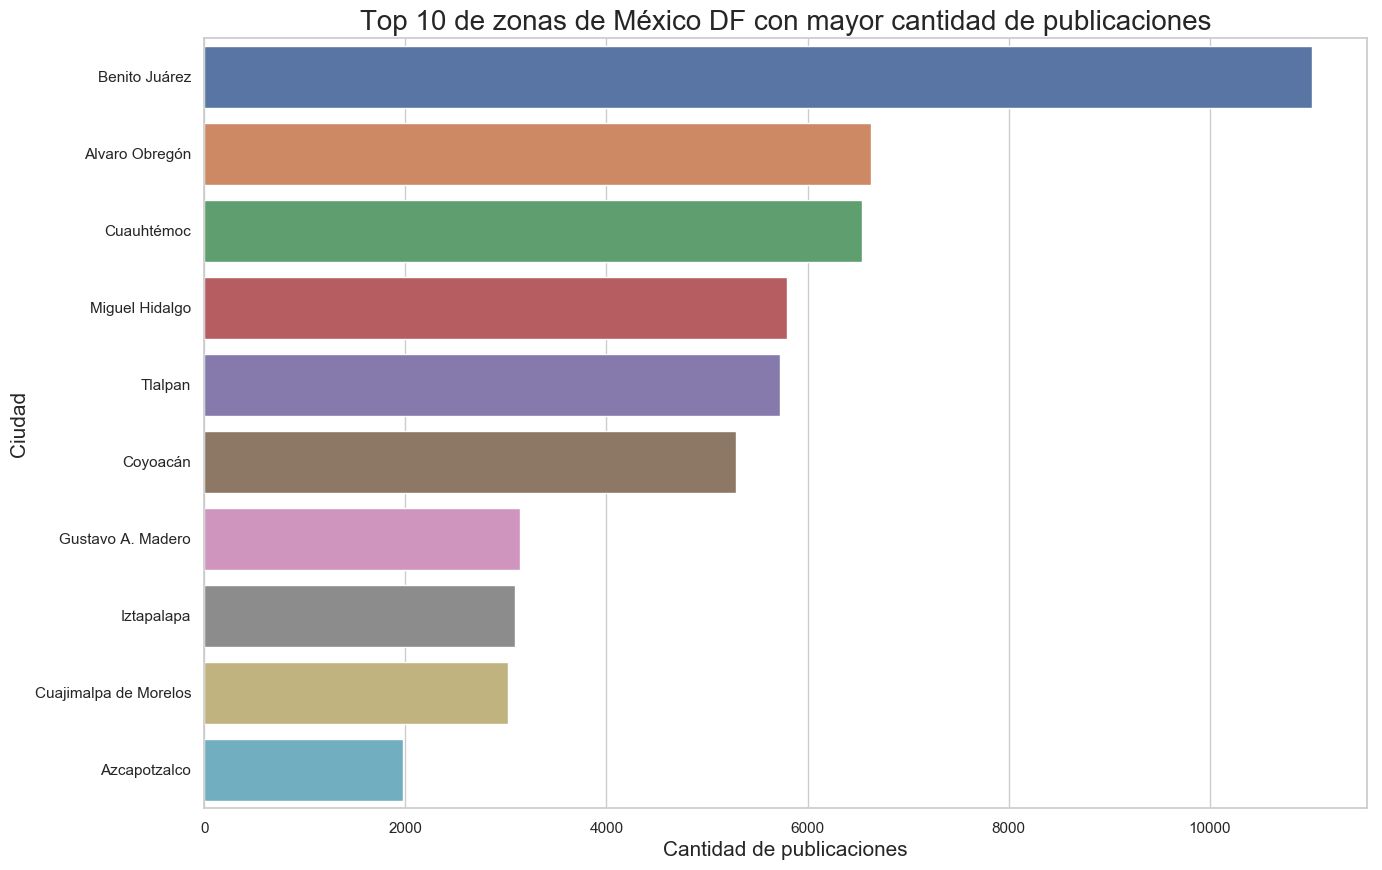

In [203]:
#Para las 5 ciudades con mayor cantidad de publicaciones, analiazamos el TOP 10 de ciudades con mayor cantidad de publicaciones
#Graficamos para ciudad de mexico el TOP 10 de las zonas o barrios con mayor cantidad de publicaciones
ciudades_df_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Distrito Federal']
ciudades_df_grafico_data = ciudades_df_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_df_grafico_data.values, y=ciudades_df_grafico_data.index, orient='h')
g.set_title(u"Top 10 de zonas de México DF con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

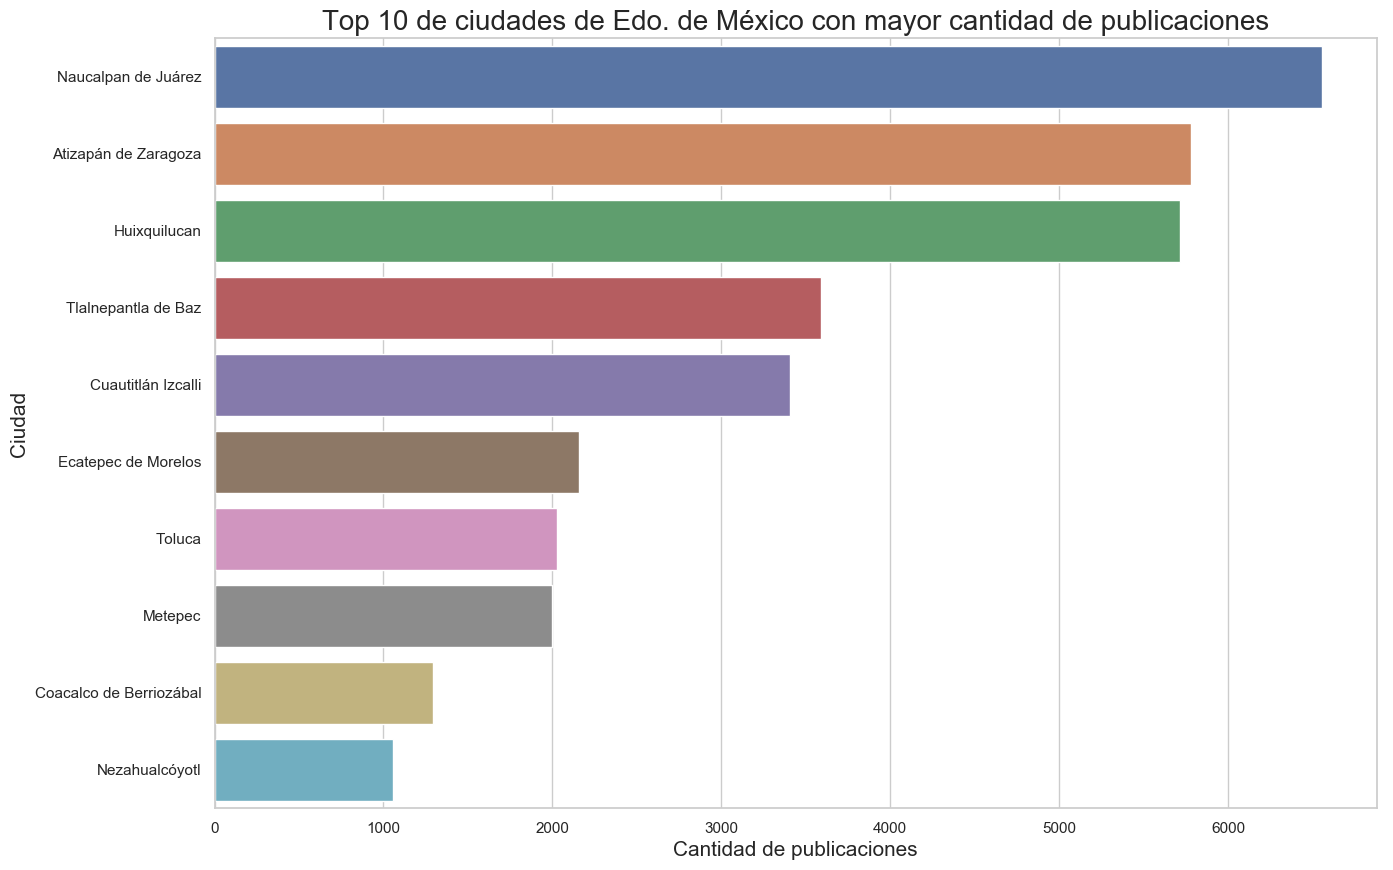

In [198]:
#Graficamos para estado de mexico el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_edo_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Edo. de México']
ciudades_edo_grafico_data = ciudades_edo_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_edo_grafico_data.values, y=ciudades_edo_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Edo. de México con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

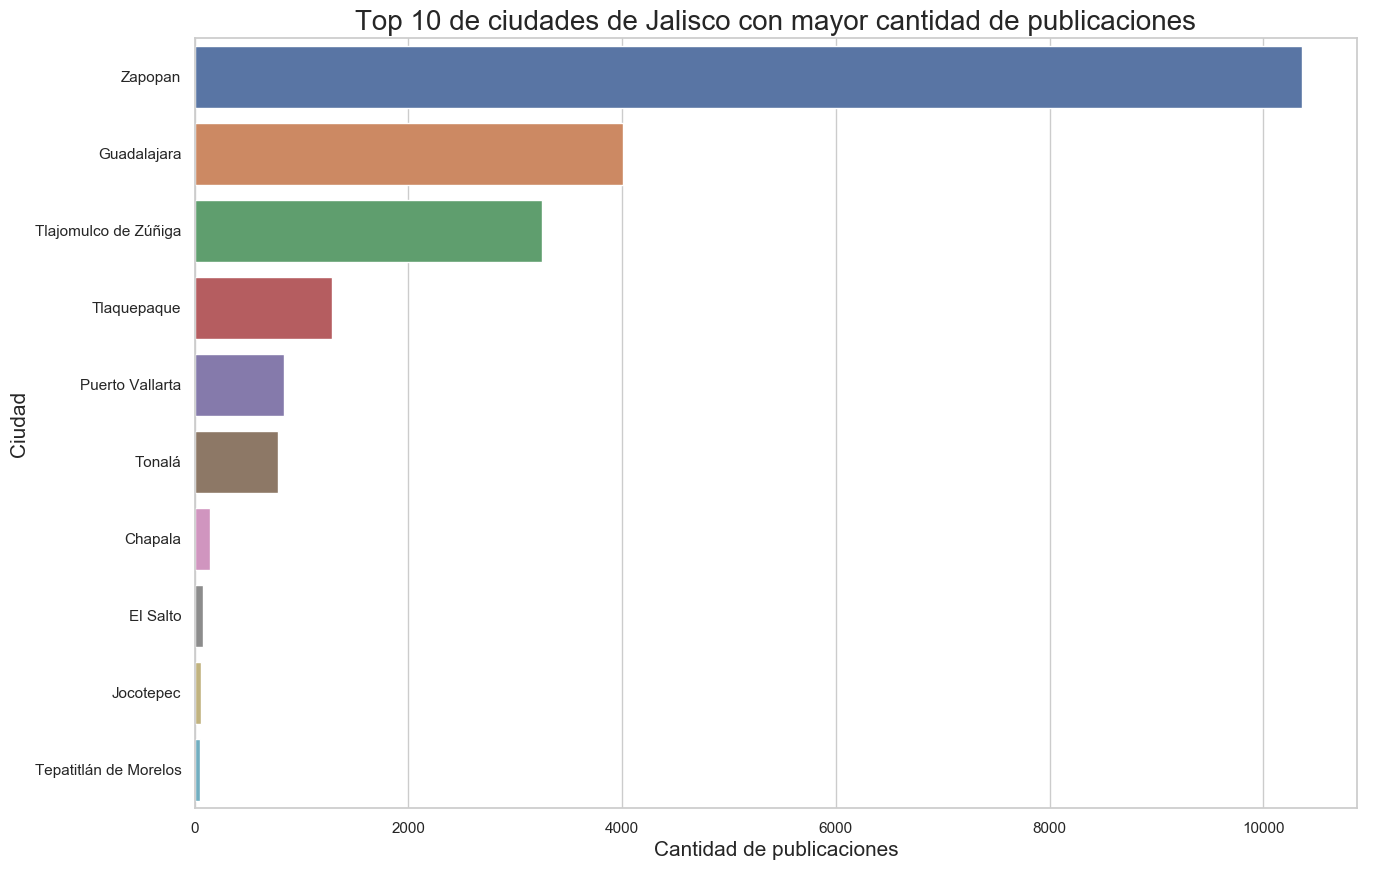

In [136]:
#Graficamos para estado de Jalisco el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Jalisco_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Jalisco']
ciudades_Jalisco_grafico_data = ciudades_Jalisco_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_Jalisco_grafico_data.values, y=ciudades_Jalisco_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Jalisco con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

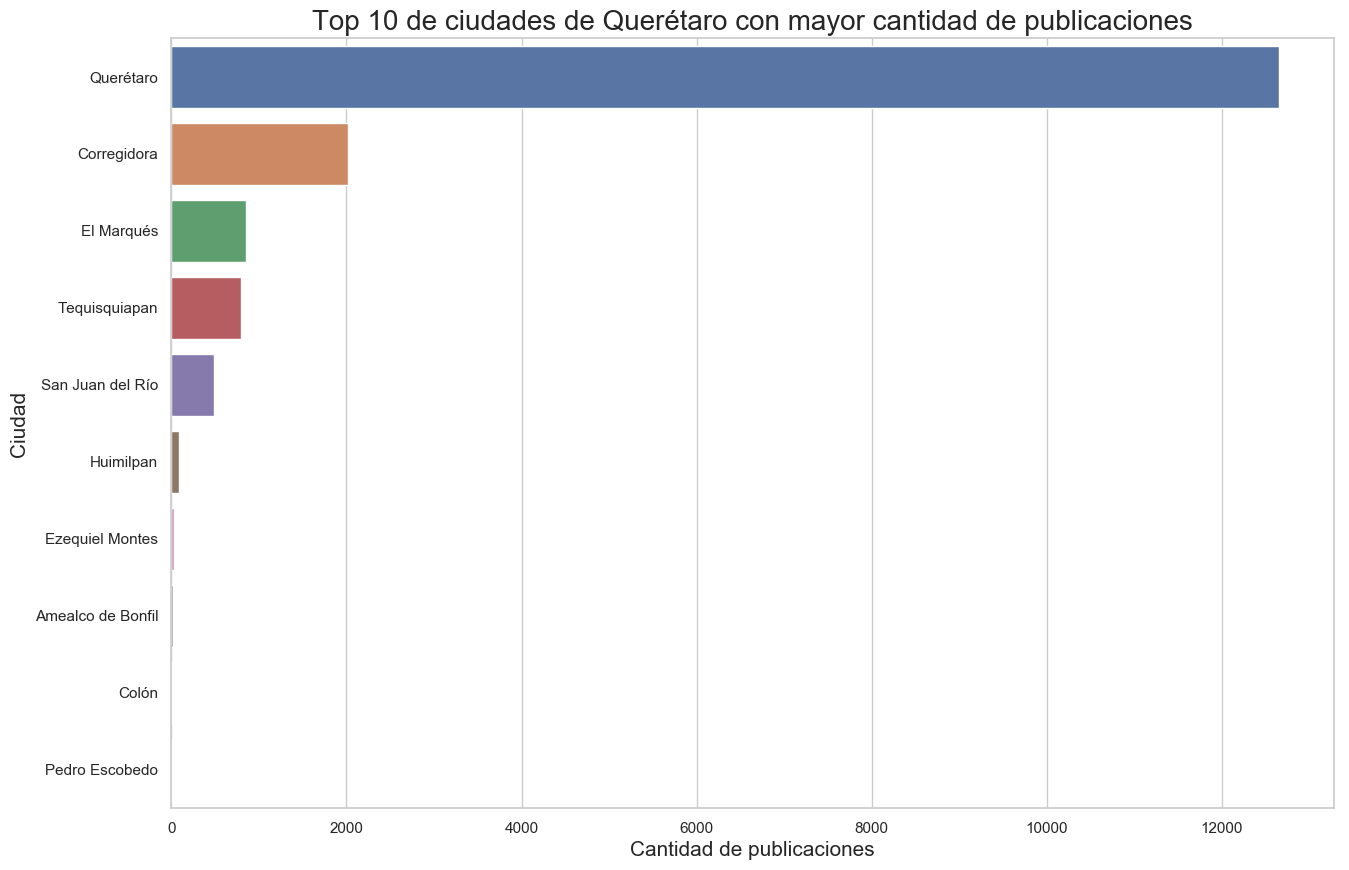

In [137]:
#Graficamos para Querétaro el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Querétaro_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Querétaro']
ciudades_Querétaro_grafico_data = ciudades_Querétaro_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_Querétaro_grafico_data.values, y=ciudades_Querétaro_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Querétaro con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

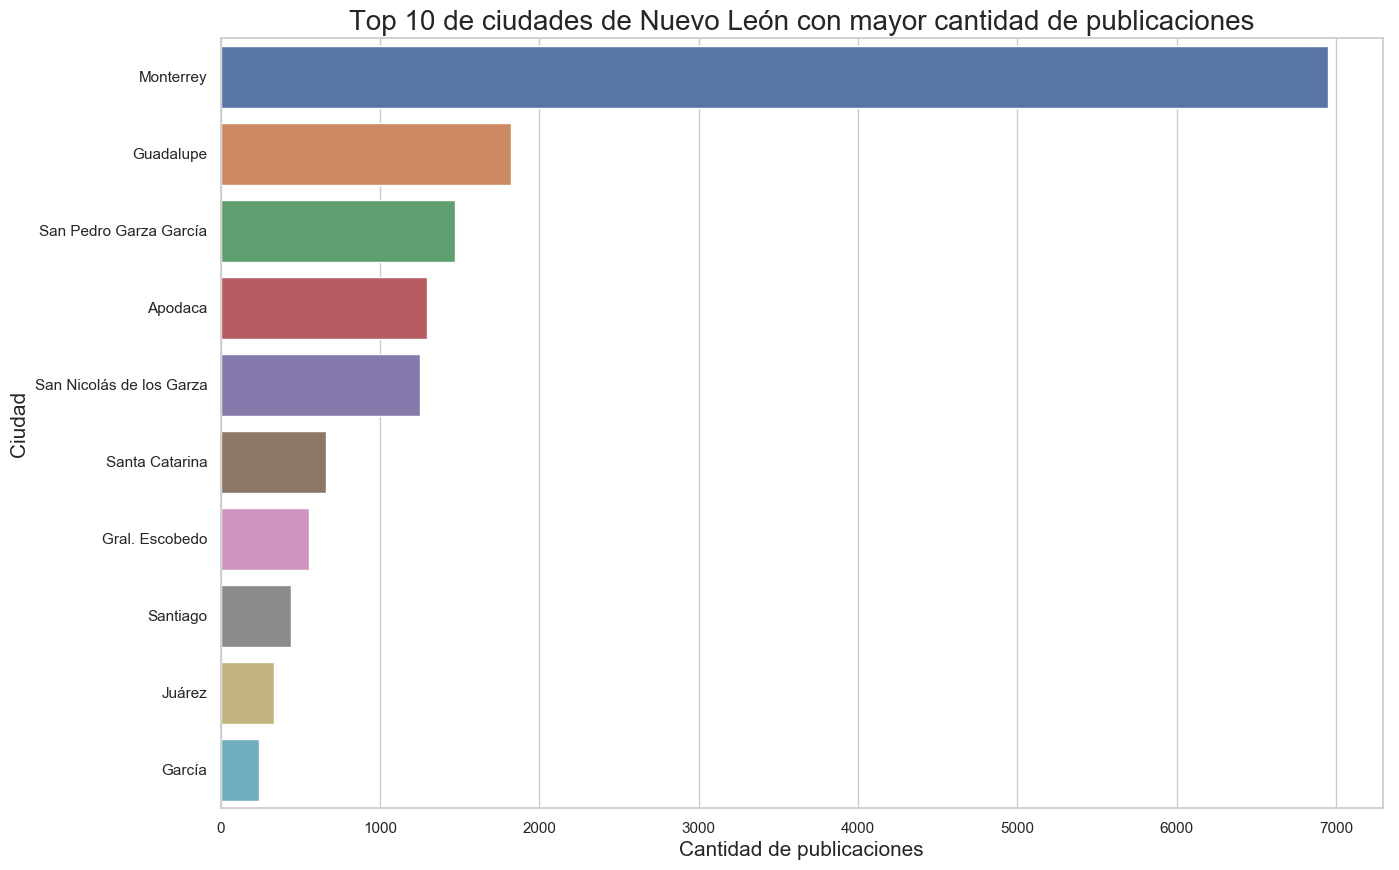

In [138]:
#Graficamos para Nuevo León el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Nuevo_León_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Nuevo León']
ciudades_Nuevo_León_grafico_data = ciudades_Nuevo_León_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_Nuevo_León_grafico_data.values, y=ciudades_Nuevo_León_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Nuevo León con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

Text(0, 0.5, 'Ciudad')

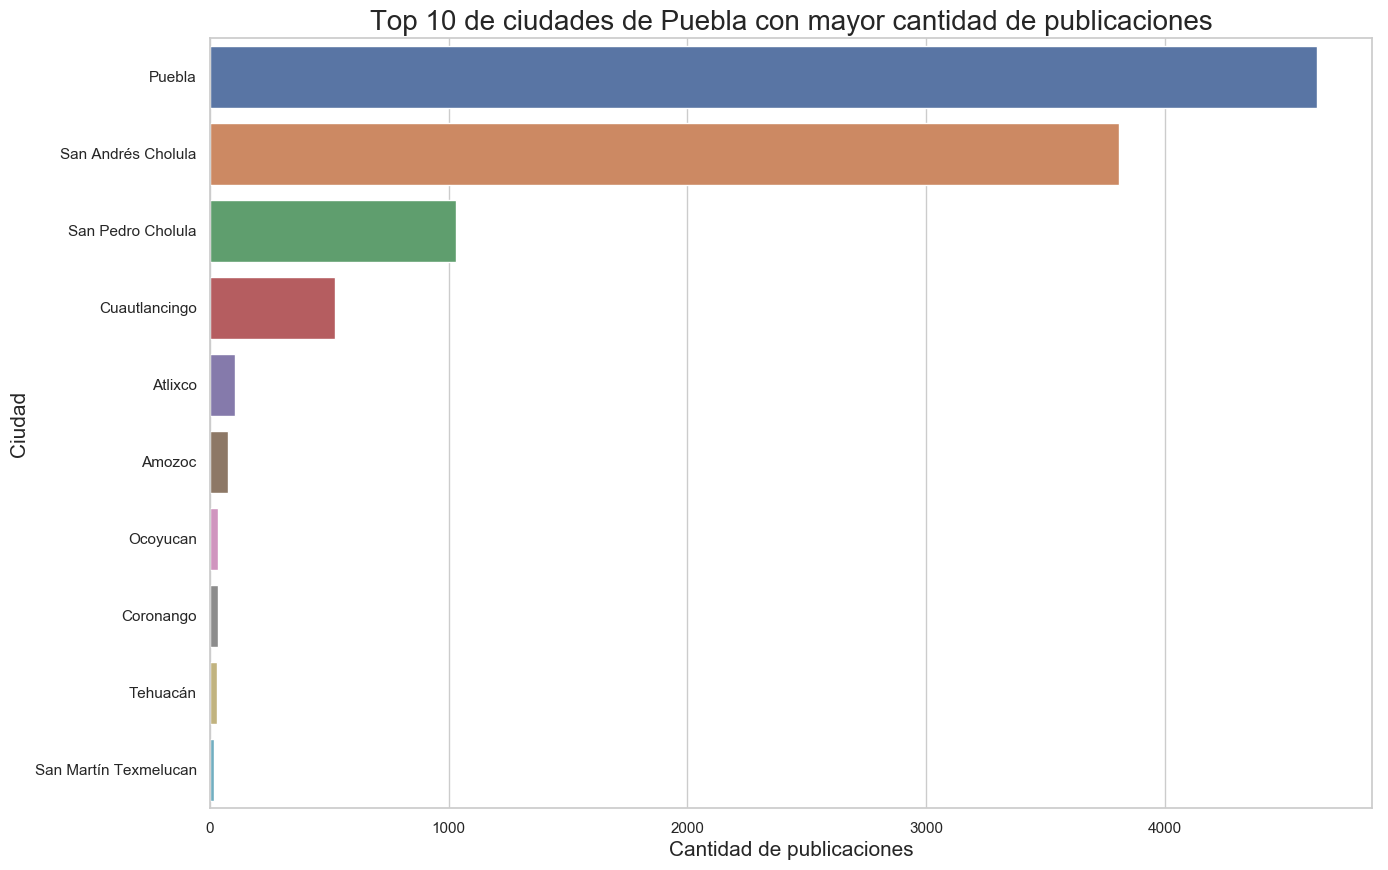

In [139]:
#Graficamos para Puebla el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Nuevo_Puebla_grafico_data = tp1_data.loc[tp1_data['provincia'] == 'Puebla']
ciudades_Nuevo_Puebla_grafico_data = ciudades_Nuevo_Puebla_grafico_data['ciudad'].value_counts()[:10]
g = sns.barplot(x=ciudades_Nuevo_Puebla_grafico_data.values, y=ciudades_Nuevo_Puebla_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Puebla con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

# <span style="font-size:18px">2 - Análisis de precios</span><br /><span style="font-size:15px">2.1 - Promedio de precios en el período disponible</span>

In [140]:
#Pasamos a datetime la columna de fecha, para tomar los años. La guadamos en una columna nueva.
tp1_data['fecha_datetime'] = pd.to_datetime(tp1_data['fecha'])
tp1_data['anio'] = tp1_data['fecha_datetime'].dt.year

#Creamos una columna string con el año, para que no aparezca con decimales en el gráfico
#Inicializamos con una 'X' la columna nueva para el año
tp1_data['anio_string'] = 'X'
tp1_data.loc[tp1_data.anio == 2012, 'anio_string'] = '2012'
tp1_data.loc[tp1_data.anio == 2013, 'anio_string'] = '2013'
tp1_data.loc[tp1_data.anio == 2014, 'anio_string'] = '2014'
tp1_data.loc[tp1_data.anio == 2015, 'anio_string'] = '2015'
tp1_data.loc[tp1_data.anio == 2016, 'anio_string'] = '2016'

#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
#Hacemos el group by, calculamos la media del precio
precio_promedio_anio = tp1_data[['anio_string','precio']].groupby('anio_string').mean().reset_index()

#Mostramos el dataframe
precio_promedio_anio.head(10)

,anio_string,precio
0,2012,"2,032,517.56"
1,2013,"2,125,061.05"
2,2014,"2,364,594.65"
3,2015,"2,634,569.73"
4,2016,"2,801,614.15"


Text(0, 0.5, 'Precio promedio')

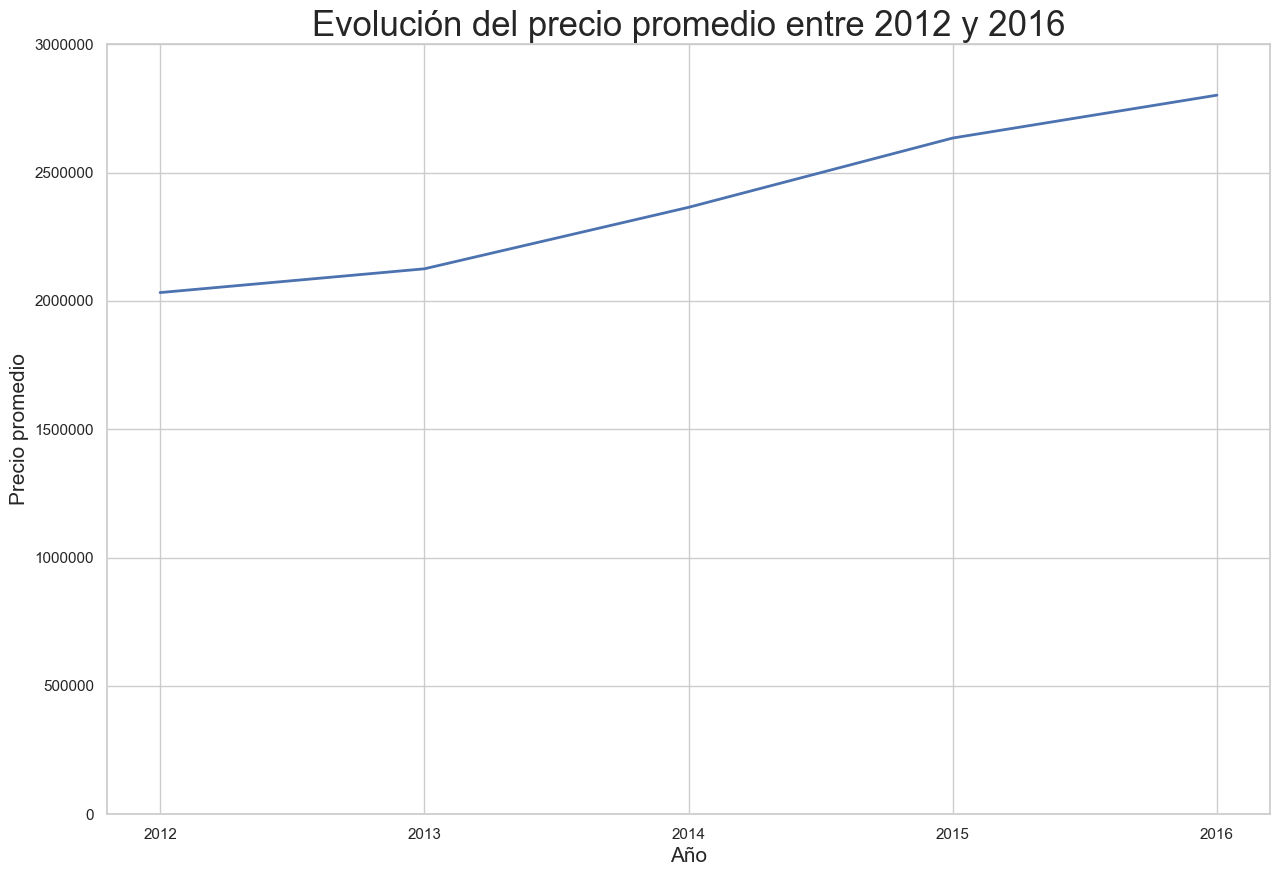

In [164]:
#Graficamos la evolución del precio promedio en el período 2012-2016 
sns.lineplot(x="anio_string", y="precio", data=precio_promedio_anio)
ax = plt.gca()
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=3000000)
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(2)
ax.set_title("Evolución del precio promedio entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

In [161]:
#Mismo que el anterior, pero sin groupby y promedio
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_anio2 = tp1_data[['anio_string','precio']]

#Mostramos el dataframe
precio_promedio_anio2.head(10)

,anio_string,precio
0,2015,"2,273,000.00"
1,2013,"3,600,000.00"
2,2015,"1,200,000.00"
3,2012,"650,000.00"
4,2016,"1,150,000.00"
5,2014,"1,100,000.00"
6,2016,"1,150,000.00"
7,2016,"4,200,000.00"
8,2014,"310,000.00"
9,2016,"6,200,000.00"


Text(0, 0.5, 'Precio promedio')

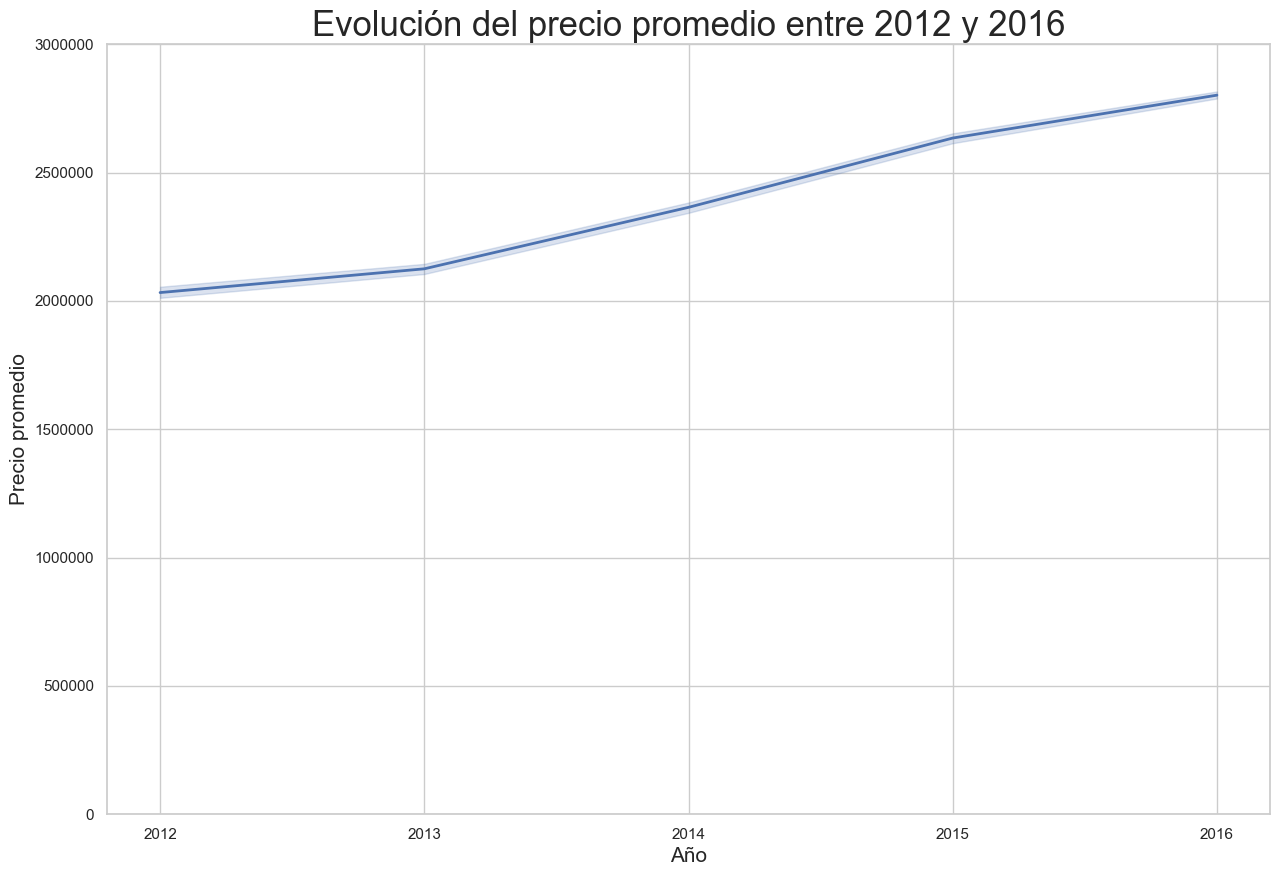

In [163]:
#Graficamos la evolución del precio promedio en el período 2012-2016 
sns.lineplot(x="anio_string", y="precio", data=precio_promedio_anio2)
ax = plt.gca()
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=3000000)
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(2)
ax.set_title("Evolución del precio promedio entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

# <span style="font-size:18px">2 - Análisis de precios</span><br /><span style="font-size:15px">2.2 - Promedio de precios por ubicación geográfica</span>

In [153]:
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_provincia_anio = tp1_data[['anio_string','provincia','precio']]

#Graficamos la evolución del precio promedio para distinto tipos de propiedades, en el período 2012-2016 
#Para los anteriores, graficamos por separado la evolucion de los precios
#Distrito Federal
#Edo. de México
#Jalisco
#Querétaro
#Nuevo León
#Puebla

precio_promedio_provincia_anio = precio_promedio_provincia_anio.loc[(precio_promedio_provincia_anio["provincia"] == 'Distrito Federal') | 
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Edo. de México') | 
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Jalisco') |
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Querétaro') |
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Nuevo León') |
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Puebla') 
                                                                    ,:]
#Mostramos el dataframe
precio_promedio_provincia_anio.head(10)

,anio_string,provincia,precio
0,2015,Distrito Federal,"2,273,000.00"
1,2013,Distrito Federal,"3,600,000.00"
2,2015,Jalisco,"1,200,000.00"
3,2012,Edo. de México,"650,000.00"
4,2016,Jalisco,"1,150,000.00"
5,2014,Distrito Federal,"1,100,000.00"
9,2016,Edo. de México,"6,200,000.00"
11,2014,Nuevo León,"7,200,000.00"
12,2013,Querétaro,"1,500,000.00"
13,2015,Distrito Federal,"3,000,000.00"


Text(0, 0.5, 'Precio promedio')

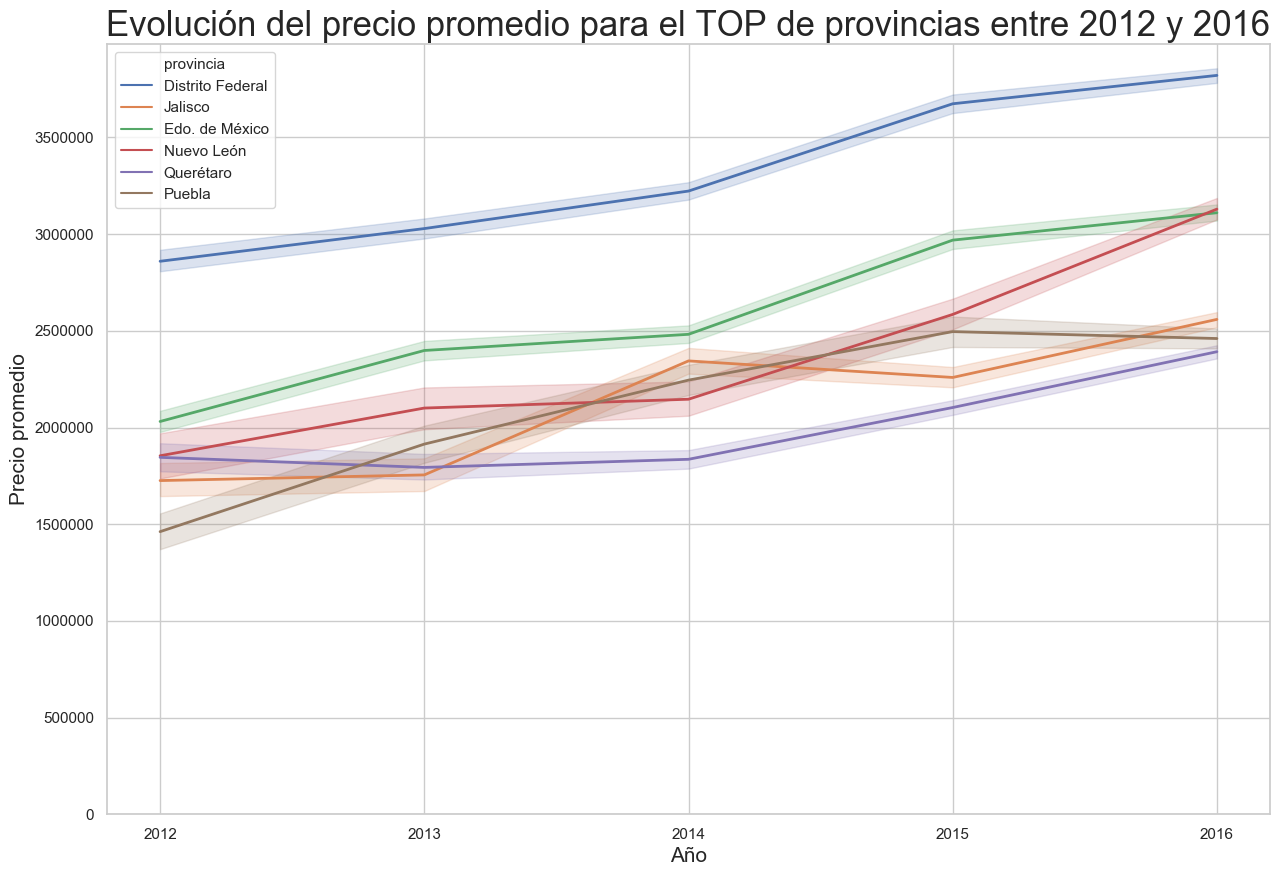

In [175]:
#Graficamos la evolución del precio promedio por provincia en el período 2012-2016 
sns.lineplot(x="anio_string", y="precio", hue="provincia", style="provincia", dashes=False, data=precio_promedio_provincia_anio)
ax = plt.gca()
ax.set_ylim(ymin=0)
for i in range(6):
    ax.lines[i].set_linestyle("-")
    ax.lines[i].set_linewidth(2)
ax.set_title("Evolución del precio promedio para el TOP de provincias entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

In [165]:
#Para la provincia con mas pubicaciones, y con mayor aumento, vemos la evolución de precios por ciudad (en este caso zona)
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_df_anio = tp1_data[['anio_string','ciudad','precio']]

#Graficamos la evolución del precio promedio para distinto tipos de propiedades, en el período 2012-2016 
#Para los anteriores, graficamos por separado la evolucion de los precios
#Benito Juárez
#Alvaro Obregón
#Cuauhtémoc
#Miguel Hidalgo 
#Tlalpan
#Coyoacán

precio_promedio_df_anio = precio_promedio_df_anio.loc[(precio_promedio_df_anio["ciudad"] == 'Benito Juárez') | 
                                                                    (precio_promedio_df_anio["ciudad"] == 'Alvaro Obregón') | 
                                                                    (precio_promedio_df_anio["ciudad"] == 'Cuauhtémoc') |
                                                                    (precio_promedio_df_anio["ciudad"] == 'Miguel Hidalgo') |
                                                                    (precio_promedio_df_anio["ciudad"] == 'Tlalpan') |
                                                                    (precio_promedio_df_anio["ciudad"] == 'Coyoacán') 
                                                                    ,:]
#Mostramos el dataframe
precio_promedio_df_anio.head(10)

,anio_string,ciudad,precio
0,2015,Benito Juárez,"2,273,000.00"
5,2014,Coyoacán,"1,100,000.00"
13,2015,Benito Juárez,"3,000,000.00"
17,2016,Benito Juárez,"4,750,000.00"
27,2012,Miguel Hidalgo,"10,800,000.00"
42,2012,Tlalpan,"3,100,000.00"
51,2015,Cuauhtémoc,"680,000.00"
52,2012,Benito Juárez,"2,100,000.00"
54,2015,Cuauhtémoc,"750,000.00"
55,2012,Benito Juárez,"4,050,000.00"


Text(0, 0.5, 'Precio promedio')

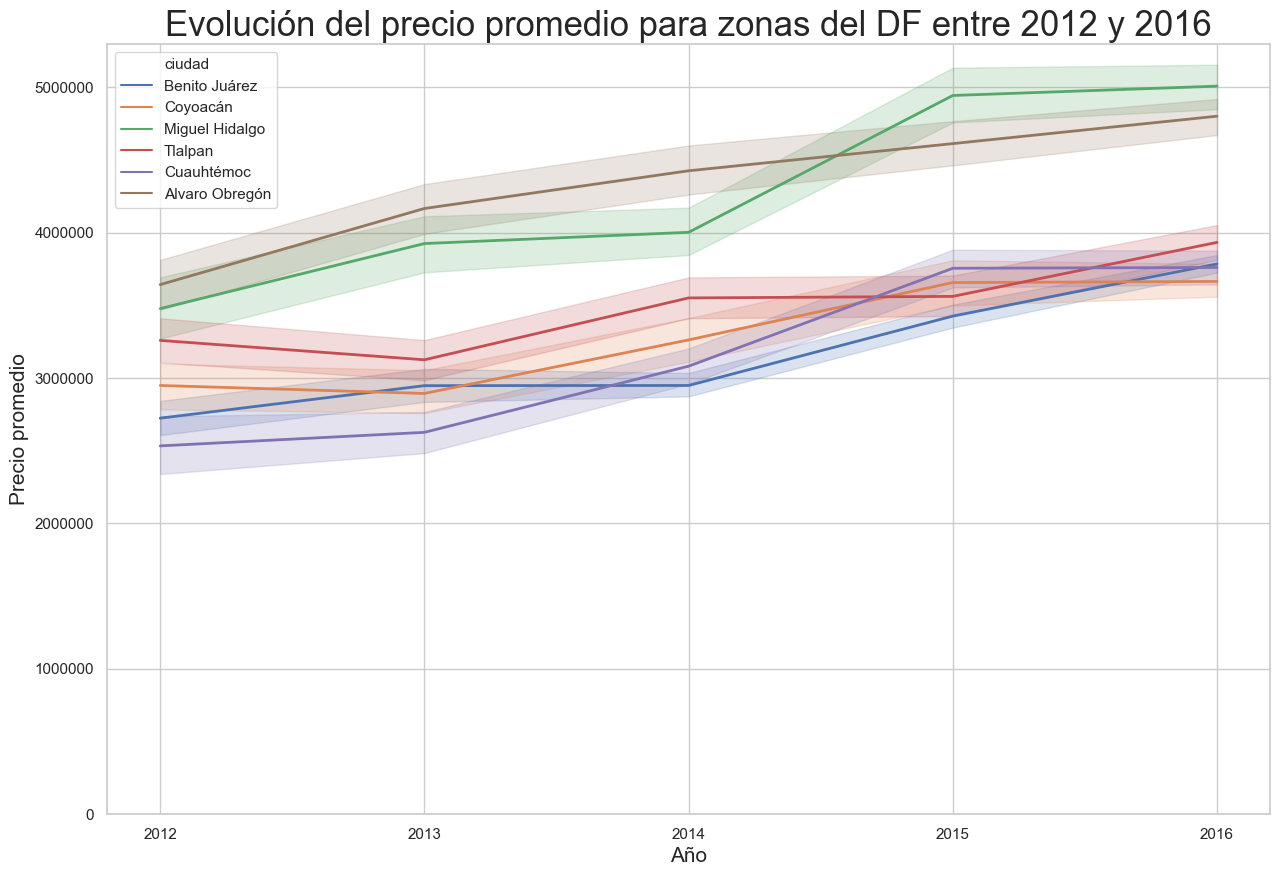

In [174]:
#Graficamos la evolución del precio promedio por zona del DF en el período 2012-2016
#El mismo análisis pude hacerse para las otras provincias - vale la pena?
sns.lineplot(x="anio_string", y="precio", hue="ciudad", style="ciudad", dashes=False, data=precio_promedio_df_anio)
ax = plt.gca()
ax.set_ylim(ymin=0)
for i in range(6):
    ax.lines[i].set_linestyle("-")
    ax.lines[i].set_linewidth(2)
ax.set_title("Evolución del precio promedio para zonas del DF entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

# <span style="font-size:18px">2 - Análisis de precios</span><br /><span style="font-size:15px">2.3 - Promedio de precios por amenities en el período disponible</span>

In [179]:
#Para las propiedades clasificadas por tipo, vemos la evolución de precios
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_tipo_anio = tp1_data[['anio_string','tipodepropiedad','precio']]

#Graficamos la evolución del precio promedio para distinto tipos de propiedades, en el período 2012-2016 
#Para los anteriores, graficamos por separado la evolucion de los precios
#Casa                             141717
#Apartamento                       57341
#Casa en condominio                19297
#Terreno                            9945
#Local Comercial                    3055
#Oficina comercial                  1741
#Bodega comercial                   1406
#Edificio                           1396
#Terreno comercial                  1326
#Casa uso de suelo                   708

precio_promedio_tipo_anio = precio_promedio_tipo_anio.loc[(precio_promedio_tipo_anio["tipodepropiedad"] == 'Casa') | 
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Apartamento') | 
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Casa en condominio') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Terreno') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Edificio') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Local Comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Oficina comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Bodega comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Terreno comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Casa uso de suelo')
                                                          ,:]
#Mostramos el dataframe
precio_promedio_tipo_anio.head(10)

,anio_string,tipodepropiedad,precio
0,2015,Apartamento,"2,273,000.00"
1,2013,Casa en condominio,"3,600,000.00"
2,2015,Casa,"1,200,000.00"
3,2012,Casa,"650,000.00"
4,2016,Apartamento,"1,150,000.00"
5,2014,Apartamento,"1,100,000.00"
6,2016,Casa,"1,150,000.00"
7,2016,Casa,"4,200,000.00"
8,2014,Apartamento,"310,000.00"
9,2016,Terreno,"6,200,000.00"


Text(0, 0.5, 'Precio promedio')

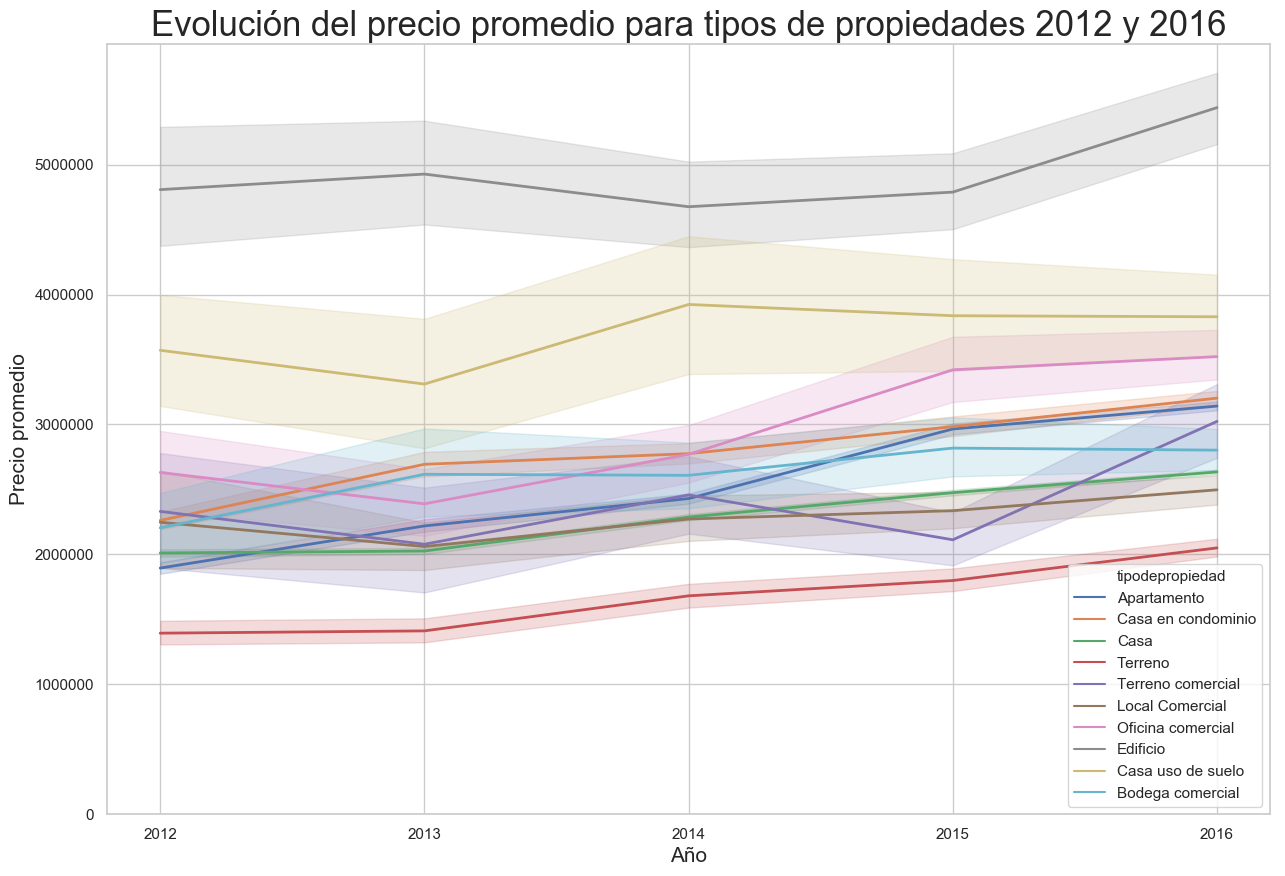

In [180]:
#Graficamos la evolución del precio promedio por tipo de propiedad en el período 2012-2016
sns.lineplot(x="anio_string", y="precio", hue="tipodepropiedad", style="tipodepropiedad", dashes=False, data=precio_promedio_tipo_anio)
ax = plt.gca()
ax.set_ylim(ymin=0)
for i in range(10):
    ax.lines[i].set_linestyle("-")
    ax.lines[i].set_linewidth(2)
ax.set_title("Evolución del precio promedio para tipos de propiedades 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

In [204]:
#ToDo:
#PRECIO PROMEDIO ANO TIPO POR AMENITY
#PRECIO PROMEDIO POR BARRIO PARA EL DF, 2016
#PRECIO VS CANTIDAD DE AMBIENTES
#PRECIO VS CANTIDAD METRAJE

# <span style="font-size:18px">3 - Análisis de Caracteristicas de las propiedades</span><br /><span style="font-size:15px">3.1 - Cantidades</span>

In [205]:
#ToDo:
#Cantidad con o sin centrocomercial cerca doble barra, para DF por barrio
#Cantidad con o sin escuelas cerca doble barra, para DF por barrio